# 모듈 불러오기

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

import streamlit as st
from datetime import date

import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 불러오기 및 전처리

In [92]:
def absd(df):
    df = pd.read_csv(df)
    df = df.query("1300 <= 대여소번호 < 1400 or 4403 <= 대여소번호 <= 4415")
    df['대여일자']= pd.to_datetime(df['대여일자'], format="%Y %m %d")
    df['year'] = df['대여일자'].dt.year
    df['month'] = df['대여일자'].dt.month
    df['day'] = df['대여일자'].dt.day
    df['성별'].replace('m', 'M', inplace = True)
    df['성별'].replace('f', 'F', inplace = True)

In [93]:
time19 = pd.read_csv('time19.csv')

In [94]:
time20 = pd.read_csv('time20.csv')

In [95]:
time21 = pd.read_csv('time21.csv')

In [96]:
def(month, latlon):
    month = pd.read_csv(month)
    time19 = pd.concat([time19, time20], axis = 0)
    time19 = pd.concat([time19, time21], axis = 0)
    latlon = pd.read_csv(latlon, encoding = 'cp949')

In [97]:
time19 = pd.concat([time19, time21], axis = 0)

In [98]:
month = pd.read_csv('month.csv')

df1= pd.read_csv('성북구 시간대별 피해운전자_전처리.csv',encoding='cp949')
df2= pd.read_csv('성북구 시간대별 가해운전자_전처리.csv')

In [99]:
latlon = pd.read_csv('latlon.csv', encoding = 'cp949')

In [100]:
month['대여일자']= pd.to_datetime(month['대여일자'], format="%Y %m %d")

# 기본설정

In [101]:
st.set_page_config(page_title='Data Dashboard', 
                   page_icon='👻', layout='wide')
st.title("성북구 따릉이 Dashboard")

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [102]:
if st.button('새로고침'):
    st.experimental_rerun()

In [103]:
st.set_option('deprecation.showPyplotGlobalUse', False)

# 사이드바 설정

In [104]:
my_df = month
st.sidebar.title("조건 필터")
st.sidebar.header("날짜 조건")
col1, col2 = st.sidebar.columns(2)
with col1:
    start_date = st.date_input("시작일시", date(2019, 1, 1),
                                       min_value=date(2019,1,1),
                                       max_value=date(2021,12,31))
with col2:
    end_date = st.date_input("종료일시", date(2021, 12, 31),
                                     min_value=date(2019,2,1),
                                     max_value=date(2021,12,31))
my_df = my_df[my_df['대여일자'].dt.date.between(start_date, end_date)]

In [105]:
st.sidebar.header('대여소 선택')
option02 = st.sidebar.multiselect('대여소 분류', (my_df.대여소명.unique()), default=(my_df.대여소명.unique()))
my_df = my_df[my_df.대여소명.isin(option02)]

# 0. OverView

In [106]:
my_df = time19

st.header('0. Overview')

col1, col2, col3 = st.columns(3)

col1.metric(label = "평균이동거리", value = round(my_df['이동거리'].mean()/1000 ,3), 
            delta=round(my_df['이동거리'].mean()/1000 - time19['이동거리'].mean()/1000, 3))

col2.metric(label = "평균사용시간", value = round(my_df['사용시간'].mean() ,3), 
            delta=round(my_df['사용시간'].mean() - time19['사용시간'].mean(), 3))

'DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)'

In [107]:
my_df = time19

col1, col2, col3 = st.columns(3)

col1.metric(label = "최다 이동거리", value = round(my_df['이동거리'].max()/1000 ,0))

col2.metric(label = "최다 사용시간", value = round(my_df['사용시간'].max()))

'DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)'

# 1. 이용건수 분석

In [108]:
st.header('1. 이용건수 분석')

st.subheader('전체')
time_frame = st.selectbox("월별/연별/일별", ("month", "year", 'day'))
whole_values = my_df.groupby(time_frame)[['이용건수']].sum()
st.download_button('Download',whole_values.to_csv(encoding='euc-kr'), '이용량.csv')
st.area_chart(whole_values, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [109]:
st.subheader('성별 현황')
st.write('성별 사용건수')
gender_count = my_df.groupby([time_frame, '성별'])['이용건수'].sum().unstack()
gender_count.columns = ['남성','여성']
st.bar_chart(data=gender_count, use_container_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

# 2. Top 5

In [110]:
def bor_top5(data):
    my_agg = pd.DataFrame(data['대여소명'].value_counts()).reset_index().head()
    my_agg.rename(columns={'대여소명':'대여횟수', 'index':'대여소명'}, inplace = True)
    fig = plt.figure(figsize=(15,10))
    ax = sns.barplot(x='대여횟수', y='대여소명', data=my_agg)

In [111]:
def age_top5(data):
    my_agg = pd.DataFrame(data['연령대코드'].value_counts()).reset_index().head()
    my_agg.rename(columns={'연령대코드':'연령별 대여횟수', 'index':'연령대'}, inplace = True)
    fig = plt.figure(figsize=(15,10))
    ax = sns.barplot(x='연령별 대여횟수', y='연령대', data=my_agg)

In [112]:
st.subheader('2. Top5 비교')

col1, col2 = st.columns(2)
with col1:
    st.write('Top5 대여소')
    st.pyplot(bor_top5(time19))
with col2:
    st.write('Top5 연령대')
    st.pyplot(age_top5(time19))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

# 3. 추가 데이터 시각화

In [113]:
year19 = df1[df1['연도']==2019]
year20 = df1[df1['연도']==2020]
year21 = df1[df1['연도']==2021]

In [114]:
st.subheader('3. 추가 데이터 인사이트 도출')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

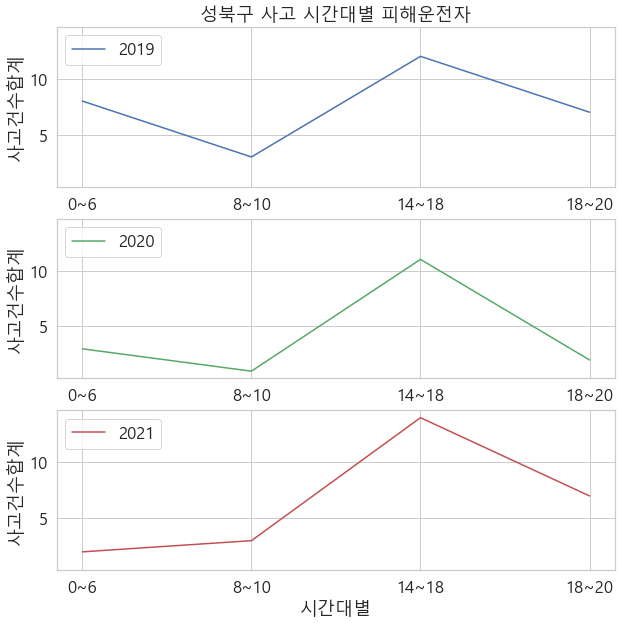

In [115]:
fig, ax = plt.subplots(3, 1, sharey=True,figsize=(10,10))


ax[0].plot(year19['시간대'],year19['사고건수합계'], color='b')
ax[1].plot(year20['시간대'],year20['사고건수합계'], color='g')
ax[2].plot(year21['시간대'],year21['사고건수합계'], color='r')


ax[2].set_xlabel('시간대별')

ax[0].set_ylabel('사고건수합계')
ax[1].set_ylabel('사고건수합계')
ax[2].set_ylabel('사고건수합계');

#ax[0].plt.legend('')
ax[0].legend(['2019'],loc = 'upper left')
ax[1].legend(['2020'],loc = 'upper left')
ax[2].legend(['2021'],loc = 'upper left')


ax[0].set_title("성북구 사고 시간대별 피해운전자");

In [116]:
year19 = df2[df2['연도']==2019]
year20 = df2[df2['연도']==2020]
year21 = df2[df2['연도']==2021]

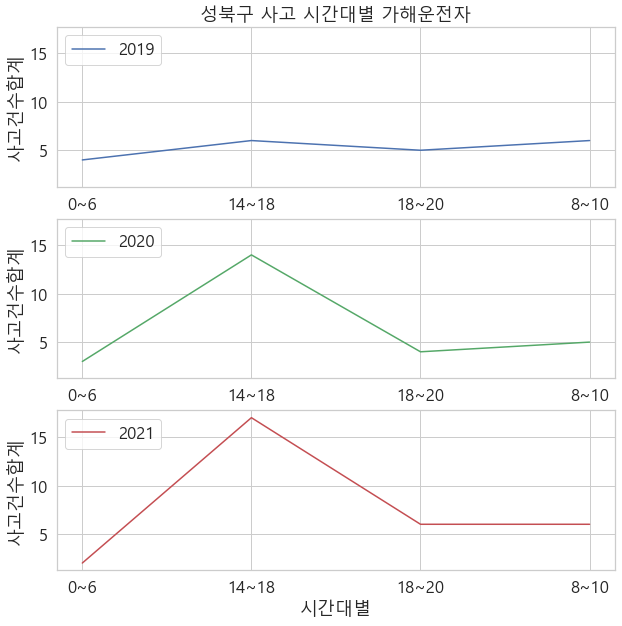

In [117]:
fig, ax = plt.subplots(3, 1, sharey=True,figsize=(10,10))


ax[0].plot(year19['시간대'],year19['사고건수합계'], color='b')
ax[1].plot(year20['시간대'],year20['사고건수합계'], color='g')
ax[2].plot(year21['시간대'],year21['사고건수합계'], color='r')


ax[2].set_xlabel('시간대별')

ax[0].set_ylabel('사고건수합계')
ax[1].set_ylabel('사고건수합계')
ax[2].set_ylabel('사고건수합계');

#ax[0].plt.legend('')
ax[0].legend(['2019'],loc = 'upper left')
ax[1].legend(['2020'],loc = 'upper left')
ax[2].legend(['2021'],loc = 'upper left')


ax[0].set_title("성북구 사고 시간대별 가해운전자");

In [118]:
df19=pd.read_csv('서울특별시 공공자전거 이용정보(시간대별(2019)).csv',encoding='cp949')
df20=pd.read_csv('서울특별시 공공자전거 이용정보(시간대별(2020)).csv',encoding='cp949')
df21=pd.read_csv('서울특별시 공공자전거 이용정보(시간대별(2021)).csv',encoding='cp949')

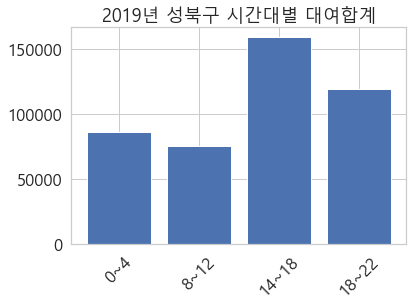

In [119]:
fig, ax = plt.subplots()
ax.bar(df19['대여시간'], df19['이용건수합계'],color='b')
ax.set_title("2019년 성북구 시간대별 대여합계");
ax.set_xticklabels(df19['대여시간'], rotation=45);

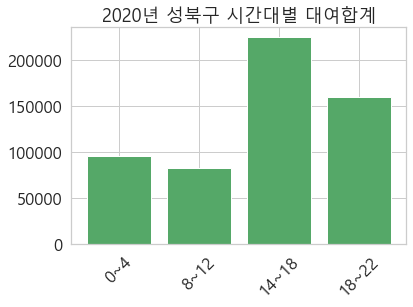

In [120]:
fig, ax = plt.subplots()
ax.bar(df20['대여시간'], df20['이용건수합계'],color='g')
ax.set_title("2020년 성북구 시간대별 대여합계")
ax.set_xticklabels(df20['대여시간'], rotation=45);

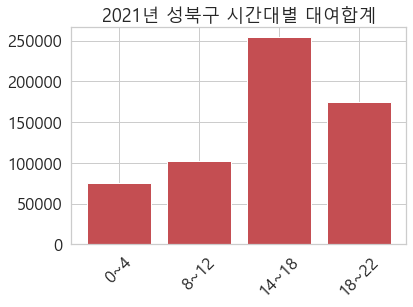

In [125]:
fig, ax = plt.subplots()
ax.bar(df21['대여시간'], df21['이용건수합계'],color='r')
ax.set_title("2021년 성북구 시간대별 대여합계")
ax.set_xticklabels(df21['대여시간'], rotation=45);

In [ ]:
col1, col2 = st.columns(2)
with col1:
    st.write('Top5 대여소')
    st.pyplot(bor_top5(time19))
with col2:
    st.write('Top5 연령대')
    st.pyplot(age_top5(time19))